In [2]:
import tensorflow as tf 

#텐서플로우에서는 GPU에 메모리 지정방식을 바꿀 수 있는 2개의 옵션을 제공한다.
#config = tf.ConfigProto()

#해당 옵션을 True로 설정하면, GPU에 메모리가 전부 할당되지 않고, 아주 적은 비율만 할당되어 시작해서, 프로세스 메모리 수요에 따라
#증가하게 된다.
#config.gpu_options.allow_growth = True

#sess = tf.Session(config=config)

#glob 모듈은 파일들의 목록을 추출할때 사용
#glob모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환한다. 단, 조건에, 정규표현식은 사용 불가
#glob.glob('*.*') = 모든 파일, glob.glob('*.txt') 모든 txt 파일
import glob

import pickle
import os
import collections
#ITK는 의료상의 분할 및 정합을 위한 라이브러리
#SimpleITK는 Python, R, Java, C #, C ++, Lua, Ruby 및 TCL을 포함한 여러 프로그래밍 언어로 제공됩니다
import SimpleITK as sitk

#nifti파일을 다루는데 사용하는 라이브러리
import nibabel as nib

import numpy as np
#hdf5 데이터 파일 포맷을 사용하기 위한 라이브러리
import tables

import random

#반복 가능한 데이터 스트림을 처리하는 데 유용한 많은 함수와 제네레이터가 포함된 라이브러리
import itertools

#객체 복사관련 라이브러리
import copy

import matplotlib.pyplot as plt
import nibabel

from random import shuffle

#Nilearn은 NeuroImaging 데이터에 대한 빠르고 쉬운 통계 학습을위한 Python 모듈
from nilearn.image import reorder_img, new_img_like, resample_to_img
from nilearn.image.image import check_niimg
from nilearn.image.image import _crop_img_to as crop_img_to

#U-Net 아키텍처는 Ronneberger et al. 2015, U-Net : 생물 의학적 이미지 분할을위한 컨볼 루션 네트워크
#3D 버전은 Çiçek et al. 2016, 3D U-Net : 희소 주석에서 조밀 한 볼륨 분할 학습
#from unet3d.model import isensee2017_model
#from unet3d.training import load_old_model, train_model

In [3]:
import matplotlib.pyplot as plt
import pydicom
import mritopng
from pydicom.data import get_testdata_files

In [3]:
#adr = "/Brain-Tumor-Progression/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/11.000000-T1post-80644"
#filename = get_testdata_files(adr + '1-01.dcm')[0]

#filename = get_testdata_files("1-01.dcm")[0]
#ds = pydicom.dcmread(filename)
#plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '19920402'
(0008, 0013) Instance Creation Time              TM: '091823.406000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.169383040232904917519603822011
(0008, 0020) Study Date                          DA: '19920402'
(0008, 0021) Series Date                         DA: '19920402'
(0008, 0022) Acquisition Date                    DA: '19920402'
(0008, 0023) Content Date                        DA: '19920402'
(0008, 0030) Study Time                          TM: '085321.125000'
(0008, 0031) Series Time                         TM: '091823.359000'
(0008, 0032) Acquisition Time                    TM: '091547.105000'
(0008, 0033) Content Time                        TM

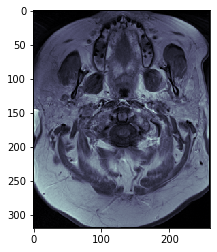

In [4]:
adr = "./Brain-Tumor-Progression/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/11.000000-T1post-80644/"
filename = adr + '1-01.dcm'

#filename = get_testdata_files("CT_small.dcm")[0]
ds = pydicom.dcmread(filename)
print(ds)
print(ds.Rows)
print(ds.Columns)
d = np.array(ds)
print(d.shape)
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

['1-01.dcm', '1-02.dcm', '1-03.dcm', '1-04.dcm', '1-05.dcm', '1-06.dcm', '1-07.dcm', '1-08.dcm', '1-09.dcm', '1-10.dcm', '1-11.dcm', '1-12.dcm', '1-13.dcm', '1-14.dcm', '1-15.dcm', '1-16.dcm', '1-17.dcm', '1-18.dcm', '1-19.dcm', '1-20.dcm', '1-21.dcm', '1-22.dcm', '1-23.dcm', '1-24.dcm']


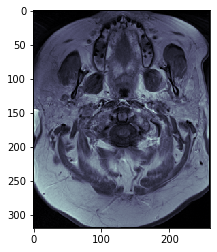

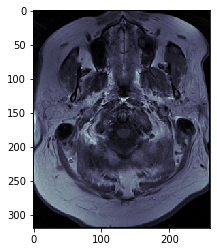

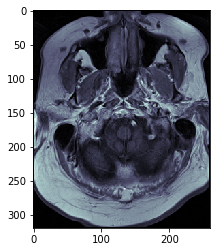

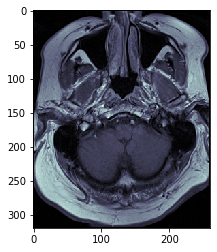

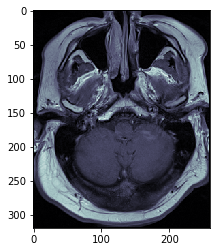

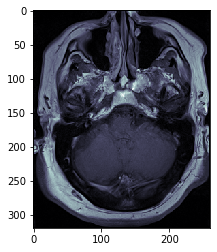

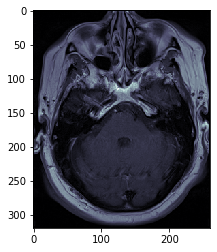

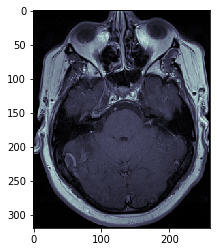

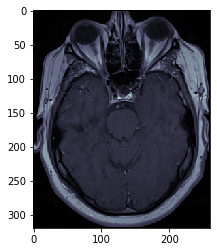

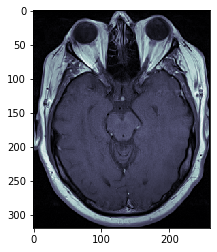

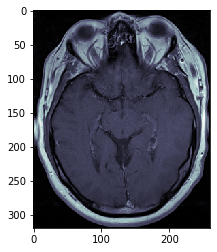

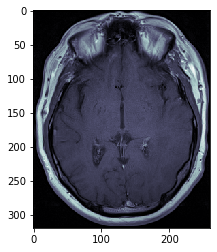

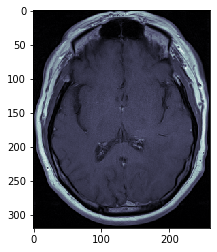

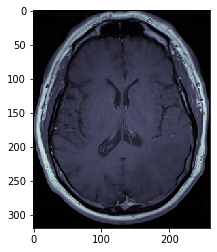

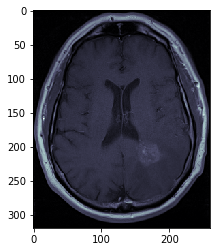

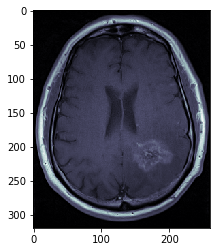

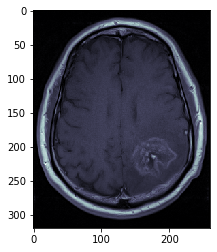

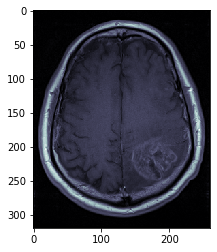

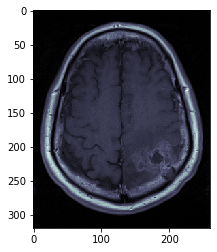

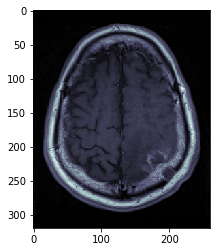

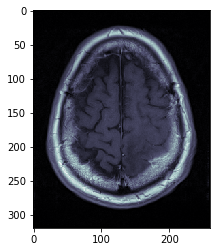

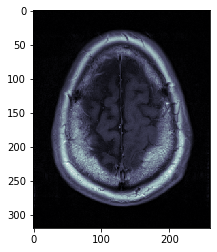

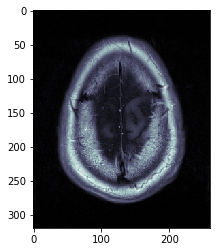

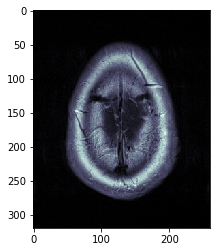

In [5]:
import os
path_dir = "./Brain-Tumor-Progression/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/11.000000-T1post-80644/"

file_list = os.listdir(path_dir)
file_list.sort()

print(file_list)

total = []

for i in file_list:
    filename = path_dir + i
    ds = pydicom.dcmread(filename)
    #plt.show()
    #plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 
    total.append(ds)
    
for j in total:
    plt.show()
    plt.imshow(j.pixel_array, cmap=plt.cm.bone) 

['1-01.dcm', '1-02.dcm', '1-03.dcm', '1-04.dcm', '1-05.dcm', '1-06.dcm', '1-07.dcm', '1-08.dcm', '1-09.dcm', '1-10.dcm', '1-11.dcm', '1-12.dcm', '1-13.dcm', '1-14.dcm', '1-15.dcm', '1-16.dcm', '1-17.dcm', '1-18.dcm', '1-19.dcm', '1-20.dcm', '1-21.dcm', '1-22.dcm', '1-23.dcm', '1-24.dcm']


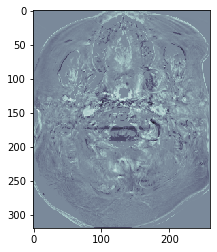

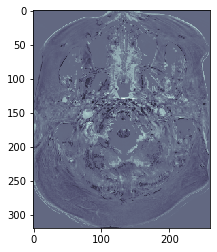

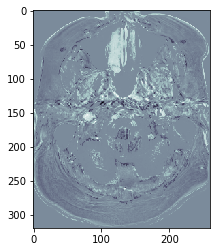

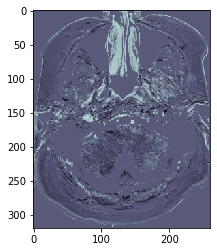

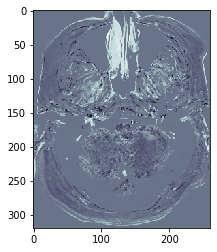

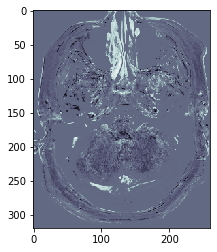

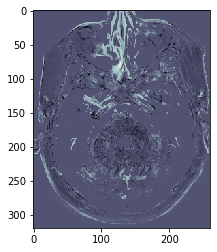

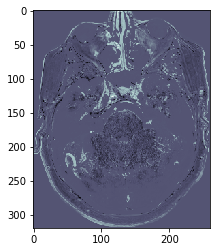

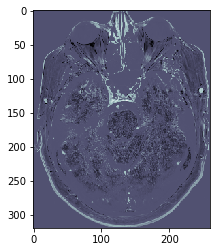

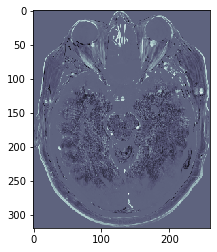

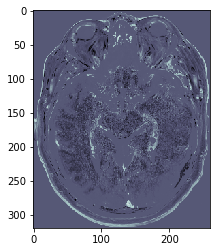

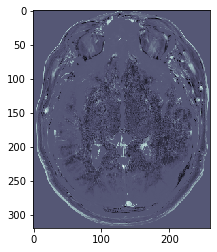

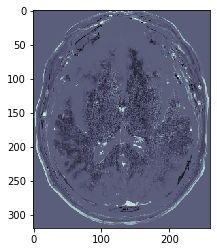

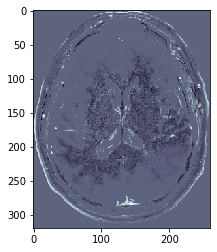

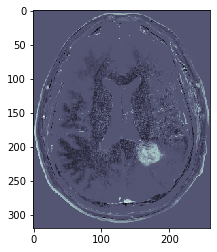

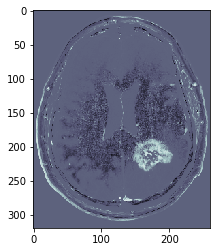

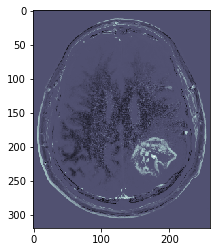

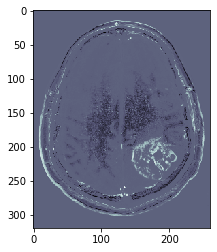

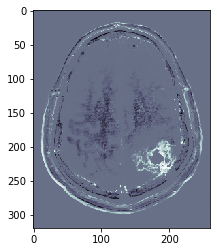

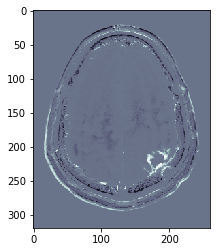

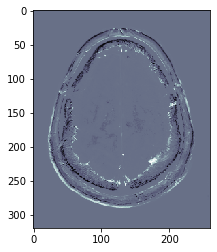

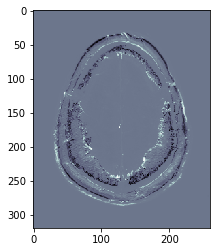

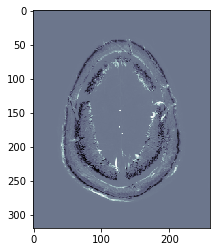

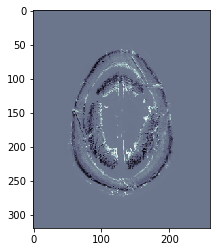

In [6]:
import os
#path_dir = "./Brain-Tumor-Progression/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/11.000000-T1post-80644/"
path_dir = "./Brain-Tumor-Progression/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/29904.000000-dT1-04743/"
file_list = os.listdir(path_dir)
file_list.sort()

print(file_list)

total = []

for i in file_list:
    filename = path_dir + i
    ds = pydicom.dcmread(filename)
    #plt.show()
    #plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 
    total.append(ds)
    
for j in total:
    plt.show()
    plt.imshow(j.pixel_array, cmap=plt.cm.bone) 

['1-01.dcm', '1-02.dcm', '1-03.dcm', '1-04.dcm', '1-05.dcm', '1-06.dcm', '1-07.dcm', '1-08.dcm', '1-09.dcm', '1-10.dcm', '1-11.dcm', '1-12.dcm', '1-13.dcm', '1-14.dcm', '1-15.dcm', '1-16.dcm', '1-17.dcm', '1-18.dcm', '1-19.dcm', '1-20.dcm', '1-21.dcm', '1-22.dcm', '1-23.dcm', '1-24.dcm']


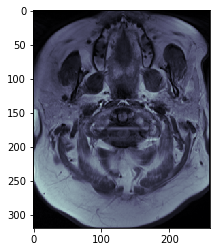

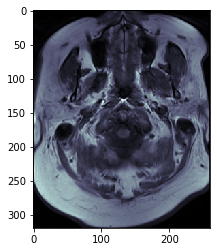

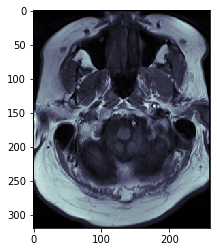

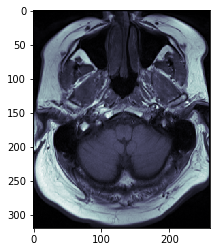

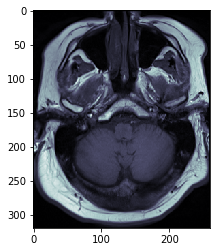

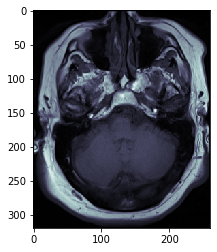

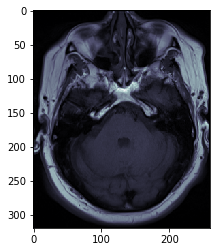

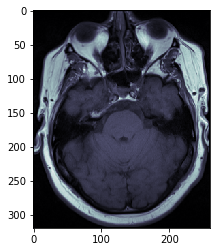

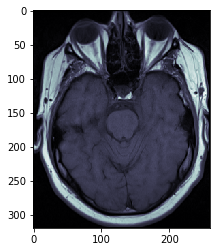

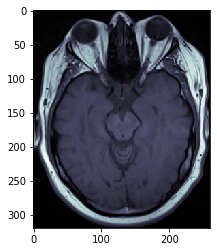

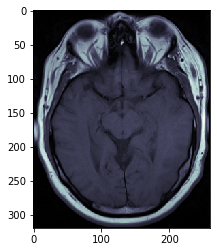

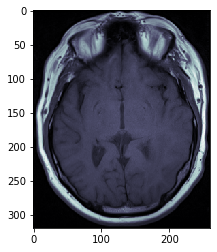

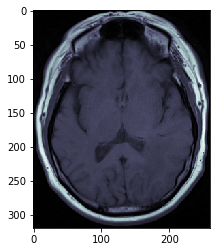

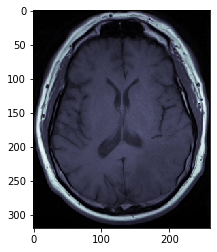

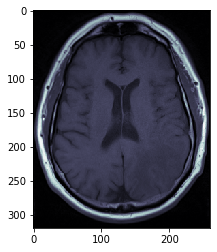

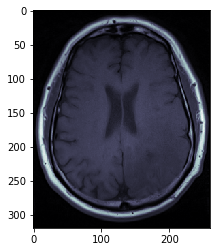

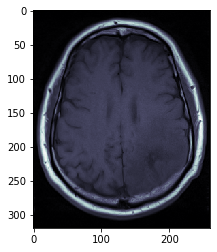

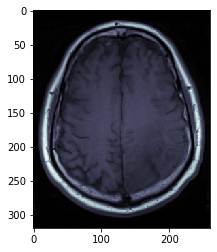

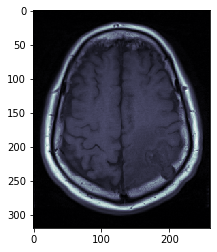

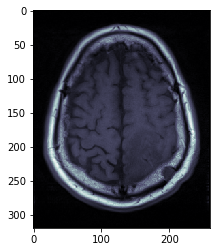

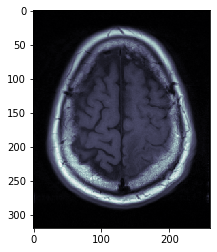

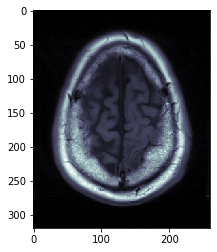

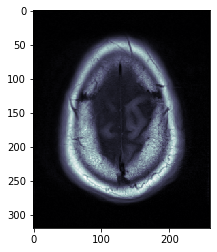

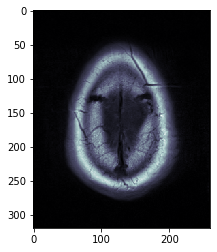

In [10]:
import os
#path_dir = "./Brain-Tumor-Progression/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/11.000000-T1post-80644/"
path_dir = "./Brain-Tumor-Progression/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/34907.000000-T1prereg-43695/"
file_list = os.listdir(path_dir)
file_list.sort()

print(file_list)

total = []

for i in file_list:
    filename = path_dir + i
    ds = pydicom.dcmread(filename)
    #plt.show()
    #plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 
    total.append(ds)
    
for j in total:
    plt.show()
    plt.imshow(j.pixel_array, cmap=plt.cm.bone) 

In [7]:
#mritopng.convert_file(ds, '/Brain-Tumor-Progression/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/11.000000-T1post-80644' + '1-01.dcm')

In [9]:
#학습 때는 dicom
#웹 페이지 서비스는 jpg나, png로

import cv2

c = 0

path_dir = adr

file_list = os.listdir(path_dir)

#files = '*.dcm'
#for i in file_list:
   # mritopng.convert_file(ds, '/Brain-Tumor-Progression/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/11.000000-T1post-80644' + 'out.png')